# Import library dan dataset

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mlt
usia = pd.read_csv('dataset_pengangguran_usia.csv', sep = ';')
usia.head()

,nama_variabel,nama_variabel_turunan,nama_tahun,nama_turunan_tahun,data_content,nama_item_vertical_variabel
0,Angkatan Kerja (AK) Menurut Golongan Umur,Pengangguran,2022,Februari,1133739,15-19
1,Angkatan Kerja (AK) Menurut Golongan Umur,Pengangguran,2022,Februari,2504512,20-24
2,Angkatan Kerja (AK) Menurut Golongan Umur,Pengangguran,2022,Februari,1343508,25-29
3,Angkatan Kerja (AK) Menurut Golongan Umur,Pengangguran,2022,Februari,754722,30-34
4,Angkatan Kerja (AK) Menurut Golongan Umur,Pengangguran,2022,Februari,649921,35-39


In [54]:
usia.columns

Index(['nama_variabel', 'nama_variabel_turunan', 'nama_tahun',
       'nama_turunan_tahun', 'data_content', 'nama_item_vertical_variabel'],
      dtype='object')

In [55]:
usia.shape

(90, 6)

# Data Cleaning

## Delete Column

In [56]:
usia.drop(['nama_variabel', 'nama_variabel_turunan', 'nama_turunan_tahun'], axis = 1, inplace = True)
usia.head()

,nama_tahun,data_content,nama_item_vertical_variabel
0,2022,1133739,15-19
1,2022,2504512,20-24
2,2022,1343508,25-29
3,2022,754722,30-34
4,2022,649921,35-39


## Rename Column

In [57]:
new_columns = {
    'nama_tahun' : 'tahun',
    'data_content' : 'jumlah_pengangguran',
    'nama_item_vertical_variabel' : 'kelompok_usia'
}
usia = usia.rename(columns = new_columns)
usia.head()

,tahun,jumlah_pengangguran,kelompok_usia
0,2022,1133739,15-19
1,2022,2504512,20-24
2,2022,1343508,25-29
3,2022,754722,30-34
4,2022,649921,35-39


## Type Casting

In [58]:
usia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   tahun                90 non-null     int64 
 1   jumlah_pengangguran  90 non-null     int64 
 2   kelompok_usia        90 non-null     object
dtypes: int64(2), object(1)
memory usage: 2.2+ KB


In [59]:
usia['tahun'] = usia['tahun'].astype(str)
usia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   tahun                90 non-null     object
 1   jumlah_pengangguran  90 non-null     int64 
 2   kelompok_usia        90 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.2+ KB


## Check Missing Value

In [60]:
usia.isnull().sum()

tahun                  0
jumlah_pengangguran    0
kelompok_usia          0
dtype: int64

## Data Aggregation with Group by

In [61]:
usia.groupby('tahun').sum()

,jumlah_pengangguran
tahun,
2014,7147069
2015,7454767
2016,7024172
2017,7005262
2018,6963457
2019,6898796
2020,6925486
2021,8746008
2022,8402153


In [62]:
usia.groupby('kelompok_usia').sum()

,jumlah_pengangguran
kelompok_usia,
15-19,11253774
20-24,21388259
25-29,11308172
30-34,5816272
35-39,4205224
40-44,3412689
45-49,3265319
50-54,2627426
55-59,1732982


## Pivot table

In [63]:
usia.pivot_table(
    index = 'kelompok_usia',
    columns = 'tahun',
    aggfunc = 'sum'
)

jumlah_pengangguran                                      \
tahun                        2014     2015     2016     2017     2018   
kelompok_usia                                                           
15-19                     1492527  1506499  1255210  1185867  1129455   
20-24                     2207102  2454384  2475889  2157591  2494756   
25-29                     1025031  1372110  1241027  1121551  1223974   
30-34                      662575   655740   517476   600742   671914   
35-39                      467781   386609   400794   412185   398486   
40-44                      361287   278279   262133   376225   318750   
45-49                      351230   352618   224408   384380   256955   
50-54                      322576   207091   232180   297844   206608   
55-59                      154469   162058   133479   278554   158746   
60+                        102491    79379   281576   190323   103813   

                                                   
tahun             2019     2020     2021     2022  
kelompok_usia                                      
15-19          1045299  1292778  1212400  1133739  
20-24          2278376  2206310  2609339  2504512  
25-29          1268358  1177974  1534639  1343508  
30-34           607437   539005   806661   754722  
35-39           431590   439372   618486   649921  
40-44           330424   320744   570598   594249  
45-49           322647   279753   488428   604900  
50-54           207872   267686   390218   495351  
55-59           159477   244416   319643   122140  
60+             247316   157448   195596   199111

# Exploratory Data Analysis

<AxesSubplot:xlabel='tahun'>

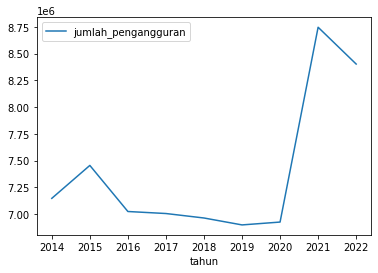

In [64]:
sns.lineplot(
    data = usia.groupby('tahun').sum()
)

# Export

In [65]:
usia.to_csv('cleaned_usia.csv')